In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# The z-score defined here is the Peak signal-to-noise ratio assuming the noise-free signal is the mean signal.

In [59]:
import scipy.stats

p1 = 0.114314000066
p2 = 0.160249522715
p1 - p2 = -0.0459355226489


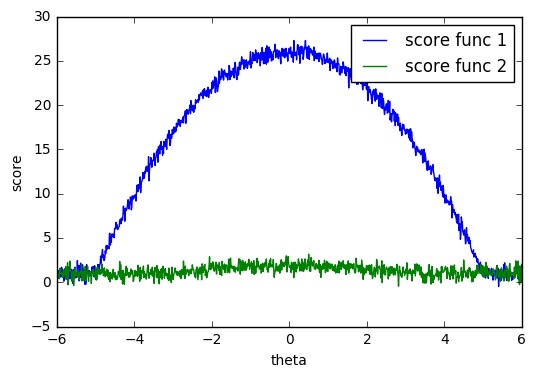

In [71]:
b1 = 5
b2 = 3
c = 1 # outside mean, does not matter

s = .5
br = 2

r = b2 * br # valid region radius
x = np.linspace(-r, r, 1000)

a1 = 1
a2 = .1

f1max = a1*b1**2 + c
f2max = a2*b2**2 + c

y1 = -a1*x**2 + a1*b1**2 + c
y1[x<-b1] = c + s * np.random.randn(np.count_nonzero(x<-b1))
y1[x>b1] = c + s * np.random.randn(np.count_nonzero(x>b1))
y1[(x>=-b1) & (x<=b1)] += s * np.random.randn(np.count_nonzero((x>=-b1) & (x<=b1)))

y2 = -a2*x**2 + (a2*b2**2) + c
y2[x<-b2] = c + s * np.random.randn(np.count_nonzero(x<-b2))
y2[x>b2] = c + s * np.random.randn(np.count_nonzero(x>b2))
y2[(x>=-b2) & (x<=b2)] += s * np.random.randn(np.count_nonzero((x>=-b2) & (x<=b2)))

z1 = ( f1max - np.mean(y1))/np.std(y1)
z2 = ( f2max - np.mean(y2))/np.std(y2)

p1 = scipy.stats.norm.sf(abs(z1))
p2 = scipy.stats.norm.sf(abs(z2))

# print 'z1 =', z1
# print 'z2 =', z2
# print 'z1 - z2 =', z1 - z2
print 'p1 =', p1
print 'p2 =', p2
print 'p1 - p2 =', p1 - p2

plt.plot(x, y1, label='score func 1');
plt.plot(x, y2, label='score func 2');
plt.ylim([-5,30]);
plt.xlabel('theta');
plt.ylabel('score');
plt.legend();
plt.show();

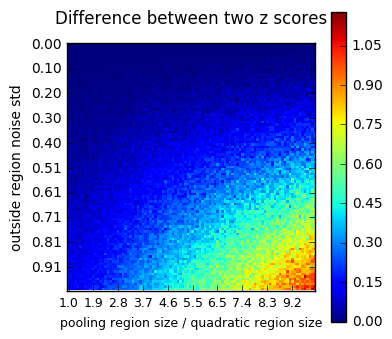

In [7]:
# This experiment shows that the z-score of maxima is independent of the steepness of function.

b = 5
c = 0 # outside mean, does not matter
a1 = 1.
a2 = .2

noise_sigmas = np.linspace(0, 1., 100)
brs = np.linspace(1., 10., 100)

ds = np.zeros((len(noise_sigmas), len(brs)))

# s = 2 # noise std,
for s_idx, s in enumerate(noise_sigmas):

#     br = .1 # valid portion of pooling region
    for br_idx, br in enumerate(brs):
        
        r = b * br
        x = np.linspace(-r, r, 1000)

#         b = r * br # valid region radius
#         b = r / br # valid region radius
    
        f1max = a1*b**2 + c
        f2max = a2*b**2 + c
        
#         noise1_std = f1max * s
#         noise2_std = f2max * s

        noise1_std = s
        noise2_std = s

        y1 = -a1*x**2 + a1*b**2 + c
        y1[x<-b] = c + noise1_std * np.random.randn(np.count_nonzero(x<-b))
        y1[x>b] = c + noise1_std * np.random.randn(np.count_nonzero(x>b))
        y1[(x>=-b) & (x<=b)] += s * np.random.randn(np.count_nonzero((x>=-b) & (x<=b)))

        y2 = -a2*x**2 + (a2*b**2) + c
        y2[x<-b] = c + noise2_std * np.random.randn(np.count_nonzero(x<-b))
        y2[x>b] = c + noise2_std * np.random.randn(np.count_nonzero(x>b))
        y2[(x>=-b) & (x<=b)] += s * np.random.randn(np.count_nonzero((x>=-b) & (x<=b)))

        z1 = ( f1max - np.mean(y1))/np.std(y1)
        z2 = ( f2max - np.mean(y2))/np.std(y2)

        ds[s_idx, br_idx] = z1 - z2
        
plt.matshow(ds, vmin=0);
plt.title('Difference between two z scores');
plt.ylabel('outside region noise std');
plt.xlabel('pooling region size / quadratic region size', fontsize=9);
plt.yticks(np.arange(0, ds.shape[0], 10), ['%.2f'%x for x in noise_sigmas[::10]]);
plt.xticks(np.arange(0, ds.shape[1], 10), ['%.1f'%x for x in brs[::10]], fontsize=9);
plt.gca().xaxis.set_ticks_position('bottom');
plt.colorbar();